# Week 11 Notebook: Risk, Bias and Ethical Considerations
The goal of this week's assignment is to build transparency into the prediction process and analyze potential risks and biases in the dataset and model output. This will be achieved by identifying important features, explaining individual predictions, evaluating bias in the input dataset and model outputs, and discussing potential risks of using the model.



### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import pickle

In [4]:
%run "week10_notebook.ipynb"

Index(['datetime', 'timestamp', 'hour', 'day', 'month', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax

### Feature Importance Analysis

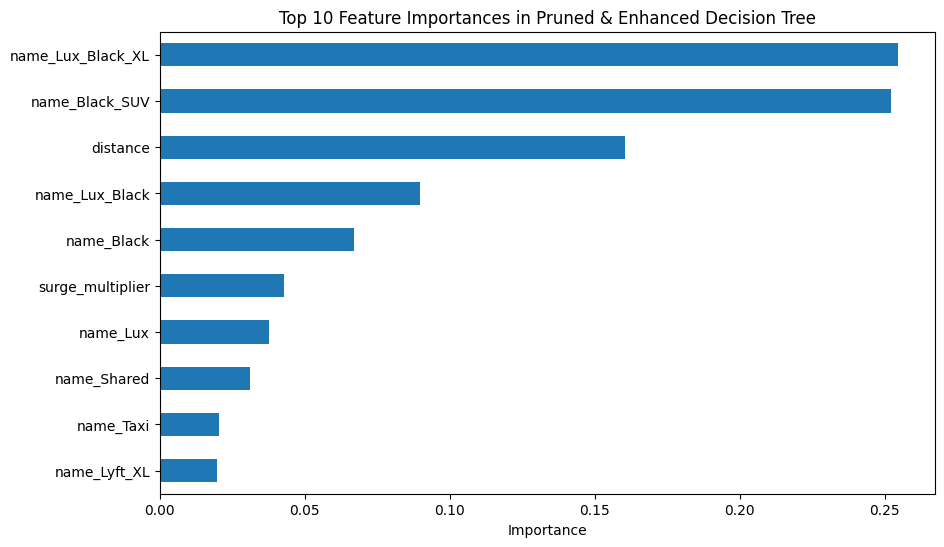

In [5]:
# Feature importances from the pruned/enhanced decision tree model
feature_importances = pd.Series(dtr_rh.feature_importances_, index=rh_X_train.columns).sort_values(ascending=False)

top_10_features = feature_importances.sort_values(ascending=False).head(10)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', title="Top 10 Feature Importances in Pruned & Enhanced Decision Tree")
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.xlabel('Importance')
plt.show()

All of the variables above are related to the variable name which indicates the type of car, and the variable distance which indicates the distance of the ride.

We will look at a few more variables.

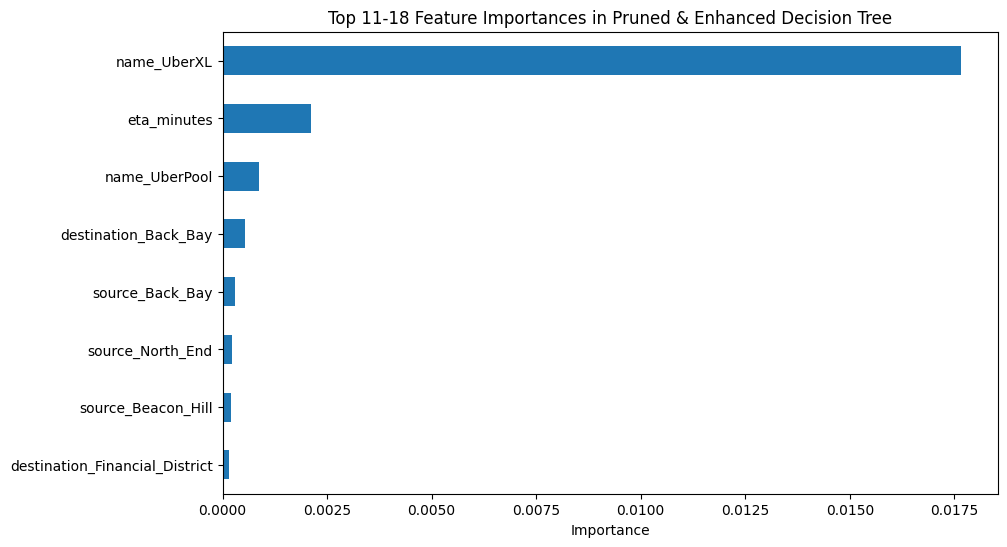

In [6]:
# Sort feature importances in descending order
next_features = feature_importances.iloc[10:18].sort_values(ascending=False)

# Plot the next important features (11-18)
plt.figure(figsize=(10, 6))
next_features.plot(kind='barh', title="Top 11-18 Feature Importances in Pruned & Enhanced Decision Tree")
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.xlabel('Importance')
plt.show()

These variables are mostly related to the source and destination of the ride.

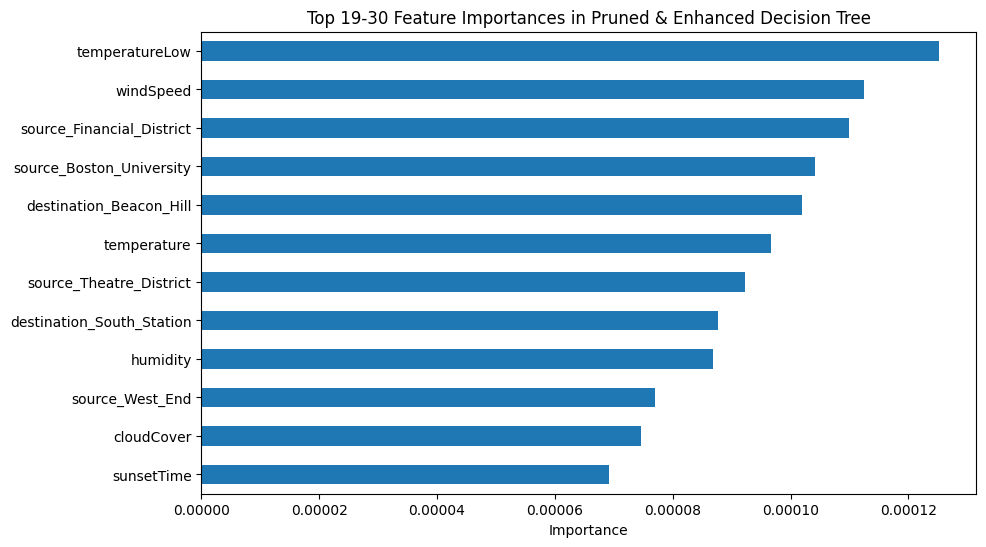

In [7]:
# Sort feature importances in descending order for the range 19-30
next_features_19_30 = feature_importances.iloc[18:30].sort_values(ascending=False)

# Plot the next important features (19-30)
plt.figure(figsize=(10, 6))
next_features_19_30.plot(kind='barh', title="Top 19-30 Feature Importances in Pruned & Enhanced Decision Tree")
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.xlabel('Importance')
plt.show()


This plot includes some weather related variables: `apparentTemperatureLow`, `windSpeed`, `humidity`, `cloudCover`, and `sunsetTime`.

### Extract and analyze 5 individual predictions

In [8]:
# Extract 5 random predictions from the test set
np.random.seed(41)
sample_indices = np.random.choice(rh_X_test.index, size=5, replace=False)
sample_actual = rh_y_test.loc[sample_indices]
sample_predictions = dtr_rh.predict(rh_X_test_scaled.loc[sample_indices])

In [9]:
# Initialize a list to store the analysis results
analysis_results = []

# Analyze prediction errors
for i, idx in enumerate(sample_indices):
    actual_price = sample_actual.loc[idx].values[0]
    predicted_price = sample_predictions[i]
    absolute_error = abs(actual_price - predicted_price)
    percentage_error = (absolute_error / actual_price) * 100

    # Append the results as a dictionary
    analysis_results.append({
        'Sample': i + 1,
        'Actual Price': actual_price,
        'Predicted Price': predicted_price,
        'Absolute Error': absolute_error,
        'Percentage Error': percentage_error
    })

# Create a DataFrame from the analysis results
error_analysis_df = pd.DataFrame(analysis_results)

# Display the DataFrame
error_analysis_df


,Sample,Actual Price,Predicted Price,Absolute Error,Percentage Error
0,1,9.5,10.583778,1.083778,11.408187
1,2,36.0,20.500000,15.500000,43.055556
2,3,22.5,19.596774,2.903226,12.903226
3,4,13.5,16.842105,3.342105,24.756335
4,5,45.0,47.350000,2.350000,5.222222


In [10]:
sample_2 = rh_X_test.iloc[sample_indices[0:], :]
selected_columns = [
    'distance', 'surge_multiplier', 'name_Black', 'name_Black_SUV', 'name_Lux',
    'name_Lux_Black', 'name_Lux_Black_XL', 'name_Lyft', 'name_Lyft_XL',
    'name_Shared', 'name_Taxi', 'name_UberPool', 'name_UberX',
    'name_UberXL', 'name_WAV', 'cab_type_Uber', 'rush_hour',
    'weekend', 'game_day', 'eta_minutes'
]

sample_2_selected = sample_2[selected_columns]
sample_2_selected

,distance,surge_multiplier,name_Black,name_Black_SUV,name_Lux,name_Lux_Black,name_Lux_Black_XL,name_Lyft,name_Lyft_XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Uber,rush_hour,weekend,game_day,eta_minutes
9745,3.05,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,0,0,1,10.49
4492,3.64,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,0,1,1,16.57
3439,3.06,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0,0,8.45
6077,2.37,1.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0,0,11.29
5372,7.46,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0,1,1,13.73


### Analysis and quantification of bias

This step is to check whether specific classes  systematically result in higher or lower prediction errors compared to other classes. We will look at the 10 most important features, which were indicated earlier. 

In [11]:
def evaluate_model(y_true, y_pred, individual_cases = False):
    if individual_cases == True:
        rmse = root_mean_squared_error(y_true, y_pred)
        mse = rmse**2
        return mse, rmse

    else:
        rmse = root_mean_squared_error(y_true, y_pred)
        mse = rmse**2
        r2 = r2_score(y_true, y_pred)
        return mse, rmse, r2

def mean_squared_error(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)
    mse = rmse**2
    return mse

In [12]:
# Bias analysis by comparing prediction errors across top 10 features
top_10_features = feature_importances.index[:10]
bias_metrics = []
for feature in top_10_features:
    unique_values = rh_X_test[feature].unique()
    if len(unique_values) <= 10:  # If the feature has 10 or fewer unique values, treat it as categorical
        for value in unique_values:
            # Filter test data for each group within the feature
            mask = rh_X_test[feature] == value
            y_test_masked = rh_y_test[mask]
            y_pred_masked = dtr_rh.predict(X_test_scaled[mask])

            # Evaluate model performance using the custom evaluate_model function
            mse, _ = evaluate_model(y_test_masked, y_pred_masked, individual_cases=True)
            #bias_metrics[(feature, value)] = {'MSE': mse}
            bias_metrics.append({'Feature': feature, 'Group': value, 'MSE': mse})

bias_metrics_df = pd.DataFrame(bias_metrics)
print("MSE Bias Analysis for Top 10 Important Features:")
print(bias_metrics_df)

MSE Bias Analysis for Top 10 Important Features:
              Feature  Group         MSE
0   name_Lux_Black_XL   0.00    3.056295
1   name_Lux_Black_XL   1.00    4.213786
2      name_Black_SUV   0.00    2.994843
3      name_Black_SUV   1.00    4.735759
4      name_Lux_Black   1.00    3.011131
5      name_Lux_Black   0.00    3.152120
6          name_Black   0.00    3.164492
7          name_Black   1.00    2.880146
8    surge_multiplier   1.00    2.933532
9    surge_multiplier   1.25    5.515025
10   surge_multiplier   2.00   19.045349
11   surge_multiplier   1.50    7.250132
12   surge_multiplier   1.75   17.827029
13   surge_multiplier   3.00  203.062500
14   surge_multiplier   2.50   40.038496
15           name_Lux   0.00    3.198494
16           name_Lux   1.00    2.410509
17        name_Shared   0.00    3.175447
18        name_Shared   1.00    2.739856
19          name_Taxi   0.00    3.275010
20          name_Taxi   1.00    1.594805
21       name_Lyft_XL   0.00    3.222075
22      

### Clean up/treat the input data, remove bias, and retrain model. 

Detect and remove outliers, apply transformations if necessary, and address any imbalances.

In [13]:
# Remove price outliers beyond 3 standard deviations for `price`
price_mean, price_std = rh_train_df['price'].mean(), rh_train_df['price'].std()
rh_train_df = rh_train_df[rh_train_df['price'] < price_mean + 3 * price_std]

# Re-split data after outlier removal
rh_X_train = rh_train_df.drop('price', axis=1)
rh_y_train = rh_train_df[['price']]
rh_X_train_scaled = scaler.fit_transform(rh_X_train)

rh_X_train_scaled = pd.DataFrame(rh_X_train_scaled, columns=rh_X_train.columns)
# Retrain the pruned decision tree model on cleaned data
dtr_rh_cleaned = DecisionTreeRegressor(
    max_depth=20,
    min_samples_split=7,
    min_samples_leaf=10,
    ccp_alpha=0.001,
    random_state=42
)
dtr_rh_cleaned.fit(rh_X_train_scaled, rh_y_train)

# Evaluate cleaned model on train, validation, and test sets
rh_y_train_pred_cleaned = dtr_rh_cleaned.predict(rh_X_train_scaled)
rh_y_val_pred_cleaned = dtr_rh_cleaned.predict(rh_X_val_scaled)
rh_y_test_pred_cleaned = dtr_rh_cleaned.predict(rh_X_test_scaled)

# Evaluate and compare performance
rh_train_mse_cleaned, rh_train_rmse_cleaned, rh_train_r2_cleaned = evaluate_model(rh_y_train, rh_y_train_pred_cleaned)
rh_val_mse_cleaned, rh_val_rmse_cleaned, rh_val_r2_cleaned = evaluate_model(rh_y_val, rh_y_val_pred_cleaned)
rh_test_mse_cleaned, rh_test_rmse_cleaned, rh_test_r2_cleaned = evaluate_model(rh_y_test, rh_y_test_pred_cleaned)

# Print comparison of original and cleaned model performance
print("Original Model - Training Metrics:")
print(f"MSE: {rh_train_mse_tree:.4f}, RMSE: {rh_train_rmse_tree:.4f}, R²: {rh_train_r2_tree:.4f}")
print("Original Model - Validation Metrics:")
print(f"MSE: {rh_val_mse_tree:.4f}, RMSE: {rh_val_rmse_tree:.4f}, R²: {rh_val_r2_tree:.4f}")
print("Original Model - Test Metrics:")
print(f"MSE: {rh_test_mse_tree:.4f}, RMSE: {rh_test_rmse_tree:.4f}, R²: {rh_test_r2_tree:.4f}")

print("\nCleaned Model - Training Metrics:")
print(f"MSE: {rh_train_mse_cleaned:.4f}, RMSE: {rh_train_rmse_cleaned:.4f}, R²: {rh_train_r2_cleaned:.4f}")
print("Cleaned Model - Validation Metrics:")
print(f"MSE: {rh_val_mse_cleaned:.4f}, RMSE: {rh_val_rmse_cleaned:.4f}, R²: {rh_val_r2_cleaned:.4f}")
print("Cleaned Model - Test Metrics:")
print(f"MSE: {rh_test_mse_cleaned:.4f}, RMSE: {rh_test_rmse_cleaned:.4f}, R²: {rh_test_r2_cleaned:.4f}")


Original Model - Training Metrics:
MSE: 2.6845, RMSE: 1.6385, R²: 0.9675
Original Model - Validation Metrics:
MSE: 3.0536, RMSE: 1.7474, R²: 0.9627
Original Model - Test Metrics:
MSE: 3.0240, RMSE: 1.7390, R²: 0.9639

Cleaned Model - Training Metrics:
MSE: 2.4186, RMSE: 1.5552, R²: 0.9668
Cleaned Model - Validation Metrics:
MSE: 3.9584, RMSE: 1.9896, R²: 0.9517
Cleaned Model - Test Metrics:
MSE: 3.8990, RMSE: 1.9746, R²: 0.9534


Removing data that has outliers for the variable `price` beyond 3 standard deviations did not improve our prediction model. The CLEANED pruned and enhanced decision tree model has a higher MSE and RMSE, and a slightly lower r-squared. 